# Question 1

# CSC2042S Assignment 1: Data Preprocessing

This notebook implements Part 1 (Data Preprocessing) of the assignment. It expects the WDI dataset to be located in `CSC2042S-Assignment1-Data/WDICSV.csv`.

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Improve plot style and resolution
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except Exception:
    plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.dpi': 120, 'savefig.dpi': 300, 'axes.titlesize': 12, 'axes.labelsize': 11, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 'legend.fontsize': 10})

DATA_DIR = Path('CSC2042S-Assignment1-Data')
WDI_PATH = DATA_DIR / 'WDICSV.csv'

In [5]:
def load_wdi_dataset(path: Path) -> pd.DataFrame:
    """Load WDI CSV into tidy format with rows as country-year and columns as indicators."""
    raw = pd.read_csv(path)
    id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code']
    year_cols = [c for c in raw.columns if c.isdigit()]
    tidy = raw.melt(id_vars=id_vars, value_vars=year_cols,
                    var_name='Year', value_name='Value').dropna(subset=['Value'])
    tidy['Year'] = tidy['Year'].astype(int)
    pivot = tidy.pivot_table(index=['Country Name','Country Code','Year'],
                             columns='Indicator Code', values='Value').reset_index()
    return pivot

In [6]:
def preprocess(df: pd.DataFrame, feature_thresh: float=0.3, sample_thresh: float=0.7) -> pd.DataFrame:
    feature_coverage = df.notna().mean()
    df = df.loc[:, feature_coverage >= feature_thresh]
    sample_coverage = df.notna().mean(axis=1)
    df = df.loc[sample_coverage >= sample_thresh]
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    return df

In [7]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    numeric = df.select_dtypes(include=[np.number])
    scaled = scaler.fit_transform(numeric)
    df[numeric.columns] = scaled
    return df

In [8]:
def visualize_tsne(df: pd.DataFrame, perplexity: float=30.0, random_state: int=0):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    emb = tsne.fit_transform(df.select_dtypes(include=[np.number]))
    plt.figure(figsize=(7,5))
    plt.scatter(emb[:,0], emb[:,1], s=8, alpha=0.8)
    plt.title('t-SNE Visualization', pad=10)
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [9]:
# Load dataset
data = load_wdi_dataset(WDI_PATH)
print(f'Loaded dataset with shape {data.shape}')
data.head()

Loaded dataset with shape (17225, 1518)


Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,0.143791,377500.0,57.878356,7650000.0,0.830251,11.728991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,NaN,0.142857,378000.0,57.955016,7700000.0,0.818765,11.805651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,NaN,0.141935,378500.0,58.031676,7750000.0,0.806915,11.882311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,NaN,0.141026,379050.0,58.116002,7800000.0,0.794757,11.958972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Preprocess dataset
processed = preprocess(data, feature_thresh=0.3, sample_thresh=0.7)
print(f'After preprocessing: {processed.shape}')
processed.head()

After preprocessing: (6679, 752)


Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.WR.ZS,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT
48,Afghanistan,AFG,2008,94.179261,1.851685,379160.0,58.132867,7794000.0,0.294306,11.949772,...,73.383361,0.319195,0.000000e+00,540065585.0,73.383361,87.2,78.604126,1.264404e+09,11.702869,1.318369
49,Afghanistan,AFG,2009,108.129575,1.887862,379160.0,58.132867,7793000.0,0.283732,11.948239,...,66.215587,0.719142,-7.387033e-15,403441021.0,66.215587,56.9,82.109162,1.663216e+09,6.982691,2.155533
50,Afghanistan,AFG,2010,115.245883,1.777860,379170.0,58.134400,7793000.0,0.275526,11.948239,...,55.781134,7.126475,0.000000e+00,388483653.0,55.781134,57.2,81.188559,2.097166e+09,9.504463,3.576210
51,Afghanistan,AFG,2011,155.958782,3.827006,379150.0,58.131334,7791000.0,0.265472,11.945173,...,66.805098,7.126475,0.000000e+00,375850943.0,66.805098,62.0,75.821519,2.571297e+09,10.473768,3.311845
52,Afghanistan,AFG,2012,114.088877,2.377852,379140.0,58.129801,7790000.0,0.254908,11.943640,...,88.656204,7.126475,0.000000e+00,305795141.0,88.656204,70.3,71.641482,1.806943e+09,14.210664,5.629446


In [11]:
# Normalize features
normalized = normalize(processed)
normalized.head()

Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.WR.ZS,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT
48,Afghanistan,AFG,0.687500,0.000869,0.000331,0.007899,0.678376,0.041976,0.141791,0.161869,...,0.743572,0.003390,3.821516e-14,0.000023,0.743572,0.023088,0.126369,0.000172,0.816570,0.837316
49,Afghanistan,AFG,0.708333,0.000998,0.000337,0.007899,0.678376,0.041970,0.136695,0.161848,...,0.670943,0.007638,3.782262e-14,0.000017,0.670943,0.014941,0.128753,0.000226,0.806764,0.838148
50,Afghanistan,AFG,0.729167,0.001064,0.000317,0.007899,0.678394,0.041970,0.132740,0.161848,...,0.565214,0.075687,3.821516e-14,0.000016,0.565213,0.015022,0.128127,0.000285,0.812003,0.839559
51,Afghanistan,AFG,0.750000,0.001440,0.000683,0.007899,0.678358,0.041959,0.127895,0.161806,...,0.676916,0.075687,3.821516e-14,0.000016,0.676916,0.016313,0.124477,0.000349,0.814016,0.839296
52,Afghanistan,AFG,0.770833,0.001053,0.000425,0.007899,0.678340,0.041954,0.122804,0.161786,...,0.898327,0.075687,3.821516e-14,0.000013,0.898327,0.018544,0.121635,0.000246,0.821780,0.841599


In [12]:
# Save cleaned dataset for Part 2
output_path = DATA_DIR / 'cleaned_data.csv'
normalized.to_csv(output_path, index=False)
print(f'Cleaned data saved to {output_path}')

Cleaned data saved to CSC2042S-Assignment1-Data/cleaned_data.csv


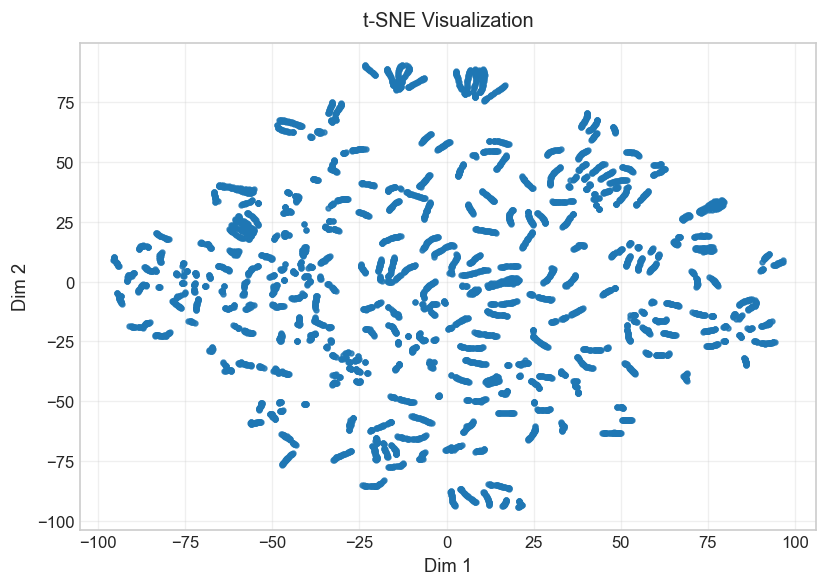

In [13]:
# Visualize with t-SNE
visualize_tsne(normalized.drop(columns=['Country Name','Country Code','Year']))

# Question 2

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Improve plot style and resolution
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except Exception:
    plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.dpi': 120, 'savefig.dpi': 300, 'axes.titlesize': 12, 'axes.labelsize': 11, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 'legend.fontsize': 10})
from pathlib import Path
from typing import List, Tuple

In [15]:
def load_dataset(path: str) -> np.ndarray:
    """Load numeric feature matrix from cleaned_data.csv and drop non-features."""
    csv_path = Path(path)
    if not csv_path.exists():
        raise FileNotFoundError(f"Dataset not found: {csv_path}")
    df = pd.read_csv(csv_path)
    # keep only numeric features and drop 'Year' if present
    X_df = df.select_dtypes(include=[float, int]).drop(columns=['Year'], errors='ignore')
    if X_df.empty:
        raise ValueError("No numeric feature columns found after dropping identifiers.")
    return X_df.values.astype(float)

In [16]:
def initialize_centroids(X: np.ndarray, k: int, rng: np.random.Generator, method: str) -> np.ndarray:
    if method == "random":
        indices = rng.choice(X.shape[0], size=k, replace=False)
        return X[indices]
    elif method == "kmeans++":
        # K-means++ with efficient squared-distance computation (no (n,k,d) broadcast).
        centroids = []
        first_idx = rng.integers(0, X.shape[0])
        centroids.append(X[first_idx])
        X_sq = np.sum(X * X, axis=1, keepdims=True)  # (n,1)
        for _ in range(1, k):
            C = np.asarray(centroids)                        # (m,d)
            C_sq = np.sum(C * C, axis=1)[None, :]            # (1,m)
            cross = X @ C.T                                  # (n,m)
            d2_all = X_sq + C_sq - 2.0 * cross               # (n,m)
            # Numerical guard: clamp tiny negatives to 0 due to FP error
            d2_all = np.clip(d2_all, 0.0, None)
            dist_sq = np.min(d2_all, axis=1)                 # (n,) nearest-centroid squared dist
            dist_sq = np.clip(dist_sq, 0.0, None)
            s = dist_sq.sum()
            if not np.isfinite(s) or s <= 0:
                next_idx = rng.integers(0, X.shape[0])
            else:
                probs = dist_sq / s
                next_idx = rng.choice(X.shape[0], p=probs)
            centroids.append(X[next_idx])
        return np.array(centroids)
    else:
        raise ValueError(f"Unknown init method: {method}")

In [17]:
def assign_clusters(X: np.ndarray, centroids: np.ndarray, return_sqdist: bool = False, X_sq: np.ndarray = None):
    # Compute squared Euclidean distances efficiently without expanding to (n,k,d).
    # Precompute or reuse squared norms of X rows (n,1) to avoid recomputation per iteration
    X_sq = np.sum(X * X, axis=1, keepdims=True) if X_sq is None else X_sq  # (n, 1)
    C_sq = np.sum(centroids * centroids, axis=1)[None, :]       # (1, k)
    cross = X @ centroids.T                                     # (n, k)
    d2 = X_sq + C_sq - 2.0 * cross                              # (n, k)
    # Numerical guard: clip tiny negatives due to floating point
    d2 = np.clip(d2, 0.0, None)
    labels = np.argmin(d2, axis=1)
    if return_sqdist:
        # Gather the min squared distance per sample for inertia computation
        min_sqdist = d2[np.arange(d2.shape[0]), labels]
        return labels, min_sqdist
    return labels


In [18]:
def compute_centroids(X: np.ndarray, labels: np.ndarray, k: int) -> np.ndarray:
    # Vectorized centroid recomputation with accumulation; re-seed empty clusters.
    d = X.shape[1]
    centroids = np.zeros((k, d), dtype=X.dtype)
    counts = np.bincount(labels, minlength=k).astype(X.dtype)
    # Accumulate sums per label
    np.add.at(centroids, labels, X)
    # Avoid division by zero; we'll handle empty below
    nonzero = counts > 0
    centroids[nonzero] /= counts[nonzero, None]
    # Reinitialize any empty cluster to a random data point
    if not np.all(nonzero):
        empty_idxs = np.where(~nonzero)[0]
        for idx in empty_idxs:
            centroids[idx] = X[np.random.randint(0, X.shape[0])]
    return centroids


In [19]:
def inertia(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    return np.sum((X - centroids[labels]) ** 2)

In [20]:
def kmeans(
    X: np.ndarray,
    k: int,
    init: str,
    max_iters: int = 100,
    tol_centroid: float = 1e-4,
    tol_inertia: float = 1e-6,
    rel_tol_inertia: float = 1e-4,
    stop: str = "inertia_delta",  # one of: 'centroid_shift', 'inertia_delta', 'max_iters'
    seed: int = None,
    init_centroids: np.ndarray = None,
) -> Tuple[np.ndarray, np.ndarray, int, List[float], List[float], str]:
    """
    K-means clustering with flexible convergence criteria.

    Returns: (centroids, labels, iterations, inertia_history, shift_history, stop_reason)
    """
    rng = np.random.default_rng(seed)
    centroids = initialize_centroids(X, k, rng, init) if init_centroids is None else init_centroids.copy()
    inertia_history: List[float] = []
    shift_history: List[float] = []
    prev_inertia: float = None
    stop_reason = "max_iters"

    # Precompute X squared norms once for faster distance computations
    _X_sq = np.sum(X * X, axis=1, keepdims=True)
    for it in range(max_iters):
        labels, min_sqdist = assign_clusters(X, centroids, return_sqdist=True, X_sq=_X_sq)
        current_inertia = float(min_sqdist.sum())
        inertia_history.append(current_inertia)
        new_centroids = compute_centroids(X, labels, k)
        shift = float(np.linalg.norm(new_centroids - centroids))
        shift_history.append(shift)
        # Apply update before checking centroid-shift stopping to match standard loop ordering
        centroids = new_centroids

        # Determine inertia improvement (absolute and relative)
        improvement_abs = None if prev_inertia is None else (prev_inertia - current_inertia)
        improvement_rel = None if prev_inertia is None or prev_inertia == 0 else improvement_abs / prev_inertia

        if stop == "centroid_shift":
            if shift < tol_centroid:
                stop_reason = "centroid_shift"
                break
        elif stop == "inertia_delta":
            if prev_inertia is not None:
                cond_abs = (tol_inertia > 0) and (improvement_abs is not None) and (improvement_abs < tol_inertia)
                cond_rel = (rel_tol_inertia > 0) and (improvement_rel is not None) and (improvement_rel < rel_tol_inertia)
                if cond_abs or cond_rel:
                    stop_reason = "inertia_delta"
                    break
        elif stop == "max_iters":
            pass  # do not early stop
        else:
            raise ValueError(f"Unknown stop criterion: {stop}")

        prev_inertia = current_inertia

    # Final assignment and one more inertia record (to match earlier usage)
    labels, min_sqdist = assign_clusters(X, centroids, return_sqdist=True, X_sq=_X_sq)
    inertia_history.append(float(min_sqdist.sum()))
    return centroids, labels, it + 1, inertia_history, shift_history, stop_reason


In [21]:
def adjusted_rand_index(labels_true: np.ndarray, labels_pred: np.ndarray) -> float:
    # contingency table
    n = len(labels_true)
    labels_true = labels_true.astype(int)
    labels_pred = labels_pred.astype(int)
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    contingency = np.zeros((len(classes), len(clusters)), dtype=int)
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((labels_true == c) & (labels_pred == k))
    sum_comb_c = np.sum([c * (c - 1) // 2 for c in contingency.sum(axis=1)])
    sum_comb_k = np.sum([c * (c - 1) // 2 for c in contingency.sum(axis=0)])
    sum_comb = np.sum([c * (c - 1) // 2 for c in contingency.ravel()])
    total_comb = n * (n - 1) // 2
    expected = sum_comb_c * sum_comb_k / total_comb
    max_index = 0.5 * (sum_comb_c + sum_comb_k)
    return (sum_comb - expected) / (max_index - expected)

In [22]:
def run_experiments(X: np.ndarray, k: int, init: str, runs: int = 5) -> dict:
    results = []
    histories = []
    labels_list = []
    for seed in range(runs):
        centroids, labels, iters, history, _, _ = kmeans(X, k, init, seed=seed)
        results.append({"seed": seed, "iterations": iters, "final_inertia": history[-1]})
        histories.append(history)
        labels_list.append(labels)
    # compute stability via pairwise ARI
    ari_scores = []
    for i in range(len(labels_list)):
        for j in range(i + 1, len(labels_list)):
            ari_scores.append(adjusted_rand_index(labels_list[i], labels_list[j]))
    stability = float(np.mean(ari_scores)) if ari_scores else float('nan')
    return {"results": results, "histories": histories, "stability": stability}

In [23]:
def plot_histories(histories: List[List[float]], title: str, filename: str):
    plt.figure(figsize=(6, 4))
    for h in histories:
        plt.plot(range(len(h)), h, alpha=0.7)
    plt.xlabel("Iteration")
    plt.ylabel("Inertia")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

In [24]:
data_path = Path("CSC2042S-Assignment1-Data/cleaned_data.csv")
X = load_dataset(data_path)
k = 3
runs = 5

Path("figures").mkdir(exist_ok=True)

random_exp = run_experiments(X, k, init="random", runs=runs)
kpp_exp = run_experiments(X, k, init="kmeans++", runs=runs)

plot_histories(random_exp["histories"], "Random Initialization", "figures/random_init_convergence.png")
plot_histories(kpp_exp["histories"], "K-means++ Initialization", "figures/kmeanspp_init_convergence.png")

print("Random initialization:")
for r in random_exp["results"]:
    print(r)
print("Average ARI stability:", random_exp["stability"])

print("\nK-means++ initialization:")
for r in kpp_exp["results"]:
    print(r)
print("Average ARI stability:", kpp_exp["stability"])

Random initialization:
{'seed': 0, 'iterations': 10, 'final_inertia': 46994.2956794137}
{'seed': 1, 'iterations': 10, 'final_inertia': 47645.315572210195}
{'seed': 2, 'iterations': 10, 'final_inertia': 46994.04330334999}
{'seed': 3, 'iterations': 13, 'final_inertia': 46996.88777426499}
{'seed': 4, 'iterations': 12, 'final_inertia': 46994.91032068121}
Average ARI stability: 0.733728058325388

K-means++ initialization:
{'seed': 0, 'iterations': 11, 'final_inertia': 46997.114818561095}
{'seed': 1, 'iterations': 4, 'final_inertia': 47610.93097885496}
{'seed': 2, 'iterations': 9, 'final_inertia': 47646.94873742291}
{'seed': 3, 'iterations': 11, 'final_inertia': 46995.754349906565}
{'seed': 4, 'iterations': 11, 'final_inertia': 47697.59458555243}
Average ARI stability: 0.5961564693027788


# Question 3
## Convergence Criteria

In [25]:
from dataclasses import dataclass
import time

@dataclass
class RunResult:
    criterion: str
    param: str
    stop_iter: int
    final_inertia: float
    runtime_s: float

def compute_full_trajectory(X: np.ndarray, k: int, init: str, seed: int, max_iters: int = 60):
    start = time.perf_counter()
    centroids, labels, iters, inertia_hist, shift_hist, _ = kmeans(
        X, k, init=init, max_iters=max_iters, stop="max_iters", seed=seed
    )
    runtime = time.perf_counter() - start
    return {"centroids": centroids, "labels": labels, "iters": iters,
            "inertia_hist": inertia_hist, "shift_hist": shift_hist, "runtime": runtime}

def find_stop_by_centroid_shift(shift_hist: List[float], tol: float) -> int:
    for i, s in enumerate(shift_hist):
        if s < tol:
            return i + 1  # iterations are 1-based
    return len(shift_hist)

def find_stop_by_inertia_delta(inertia_hist: List[float], tol_abs: float = 0.0, tol_rel: float = 0.0) -> int:
    # inertia_hist length is (#iters + 1). Compare consecutive entries.
    for i in range(1, len(inertia_hist)):
        prev_i, curr_i = inertia_hist[i-1], inertia_hist[i]
        improvement_abs = prev_i - curr_i
        improvement_rel = (improvement_abs / prev_i) if prev_i != 0 else 0.0
        cond_abs = (tol_abs > 0) and (improvement_abs < tol_abs)
        cond_rel = (tol_rel > 0) and (improvement_rel < tol_rel)
        if cond_abs or cond_rel:
            return i  # stopping after completing iteration i
    return len(inertia_hist) - 1

def summarize_and_plot_q3(X: np.ndarray, k: int, init: str = "kmeans++", seed: int = 0):
    traj = compute_full_trajectory(X, k, init=init, seed=seed, max_iters=60)
    inertia_hist = traj["inertia_hist"]
    shift_hist = traj["shift_hist"]
    baseline_iters = len(shift_hist)
    baseline_final = inertia_hist[-1]

    # Criteria to evaluate
    centroid_tols = [1e-2, 1e-3, 1e-4]
    inertia_rel_tols = [1e-3, 1e-4, 1e-5]
    max_iters_list = [10, 20, 50]

    results: List[RunResult] = []

    # Evaluate centroid-shift thresholds
    for tol in centroid_tols:
        stop_iter = find_stop_by_centroid_shift(shift_hist, tol)
        final_inertia = inertia_hist[min(stop_iter, len(inertia_hist)-1)]
        results.append(RunResult(
            criterion="centroid_shift", param=f"tol={tol}", stop_iter=stop_iter,
            final_inertia=float(final_inertia), runtime_s=float(np.nan)
        ))

    # Evaluate inertia-delta thresholds (relative)
    for rtol in inertia_rel_tols:
        stop_iter = find_stop_by_inertia_delta(inertia_hist, tol_abs=0.0, tol_rel=rtol)
        final_inertia = inertia_hist[min(stop_iter, len(inertia_hist)-1)]
        results.append(RunResult(
            criterion="inertia_delta", param=f"rel_tol={rtol}", stop_iter=stop_iter,
            final_inertia=float(final_inertia), runtime_s=float(np.nan)
        ))

    # Evaluate max-iter caps
    for mi in max_iters_list:
        stop_iter = min(mi, len(shift_hist))
        final_inertia = inertia_hist[min(stop_iter, len(inertia_hist)-1)]
        results.append(RunResult(
            criterion="max_iters", param=f"max={mi}", stop_iter=stop_iter,
            final_inertia=float(final_inertia), runtime_s=float(np.nan)
        ))

    # Plot trajectories with stop markers
    its = list(range(len(inertia_hist)))
    plt.figure(figsize=(7,4))
    plt.plot(its, inertia_hist, label="Inertia")
    for r in results:
        plt.axvline(r.stop_iter, linestyle='--', alpha=0.5, label=f"{r.criterion}:{r.param}")
    plt.xlabel('Iteration')
    plt.ylabel('Inertia')
    plt.title('Objective Trajectory with Different Stopping Conditions')
    plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/q3_inertia_trajectories.png', dpi=300, bbox_inches='tight')
    plt.close()

    plt.figure(figsize=(7,4))
    plt.plot(range(1, len(shift_hist)+1), shift_hist, label="Centroid shift")
    for r in results:
        plt.axvline(r.stop_iter, linestyle='--', alpha=0.5, label=f"{r.criterion}:{r.param}")
    plt.xlabel('Iteration')
    plt.ylabel('Centroid shift (L2)')
    plt.title('Centroid Movement with Different Stopping Conditions')
    plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/q3_shift_trajectories.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Choose recommended thresholds: within 0.05% of baseline inertia, minimal iterations
    rec_centroid = None
    rec_inertia = None
    tol_pct = 5e-4
    # filter matching
    cs = [r for r in results if r.criterion == 'centroid_shift' and (r.final_inertia - baseline_final)/baseline_final <= tol_pct]
    idr = [r for r in results if r.criterion == 'inertia_delta' and (r.final_inertia - baseline_final)/baseline_final <= tol_pct]
    if cs:
        rec_centroid = sorted(cs, key=lambda r: r.stop_iter)[0]
    if idr:
        rec_inertia = sorted(idr, key=lambda r: r.stop_iter)[0]

    return {
        'results': results,
        'baseline_iters': baseline_iters,
        'baseline_final': float(baseline_final),
        'recommended_centroid_shift': rec_centroid,
        'recommended_inertia_rel': rec_inertia,
        'inertia_hist': inertia_hist,
        'shift_hist': shift_hist,
    }


In [26]:
# Run Q3 evaluation and save plots
Path('figures').mkdir(exist_ok=True)
q3 = summarize_and_plot_q3(X, k=3, init='kmeans++', seed=0)

print('Baseline iterations:', q3['baseline_iters'])
print('Baseline final inertia:', q3['baseline_final'])
print()
for r in q3['results']:
    rel = (r.final_inertia - q3['baseline_final']) / q3['baseline_final']
    print(f"{r.criterion:15s} {r.param:15s} -> stop@{r.stop_iter:3d}, final_inertia={r.final_inertia:.4f}, \
          rel_diff={rel:.6f}")

print()
rc = q3['recommended_centroid_shift']
ri = q3['recommended_inertia_rel']
if rc is not None:
    print(f"Recommended centroid-shift tol: {rc.param} (stop@{rc.stop_iter})")
else:
    print('No centroid-shift tol met the 0.05% criterion.')
if ri is not None:
    print(f"Recommended inertia rel tol: {ri.param} (stop@{ri.stop_iter})")
else:
    print('No inertia rel tol met the 0.05% criterion.')


Baseline iterations: 60
Baseline final inertia: 46993.980643437884

centroid_shift  tol=0.01        -> stop@ 15, final_inertia=46994.3410,           rel_diff=0.000008
centroid_shift  tol=0.001       -> stop@ 19, final_inertia=46993.9806,           rel_diff=0.000000
centroid_shift  tol=0.0001      -> stop@ 19, final_inertia=46993.9806,           rel_diff=0.000000
inertia_delta   rel_tol=0.001   -> stop@  6, final_inertia=47038.3630,           rel_diff=0.000944
inertia_delta   rel_tol=0.0001  -> stop@ 10, final_inertia=46999.2948,           rel_diff=0.000113
inertia_delta   rel_tol=1e-05   -> stop@ 15, final_inertia=46994.3410,           rel_diff=0.000008
max_iters       max=10          -> stop@ 10, final_inertia=46999.2948,           rel_diff=0.000113
max_iters       max=20          -> stop@ 20, final_inertia=46993.9806,           rel_diff=0.000000
max_iters       max=50          -> stop@ 50, final_inertia=46993.9806,           rel_diff=0.000000

Recommended centroid-shift tol: tol=0.01

Notes: The plots are saved to `figures/q3_inertia_trajectories.png` and `figures/q3_shift_trajectories.png`. Recommended thresholds are chosen as the smallest parameter that achieves a final inertia within 0.05% of the baseline (last point of the 60-iteration trajectory), to balance computational cost and clustering quality.

# Question 4
## Determining the Optimal K (Elbow Method)

In [27]:
from typing import Dict

def compute_elbow_data(
    X: np.ndarray,
    ks: List[int],
    init: str = 'kmeans++',
    runs: int = 5,
    seed_offset: int = 0,
) -> Dict[str, object]:
    """Run K-means for each K multiple times and collect final inertias.
    Uses the best (minimum) final inertia per K for the elbow curve, and stores
    the corresponding labels and centroids for visualization.
    """
    inertias_min: List[float] = []
    inertias_mean: List[float] = []
    labels_by_k: Dict[int, np.ndarray] = {}
    centroids_by_k: Dict[int, np.ndarray] = {}

    for k in ks:
        finals = []
        best_fin = float('inf')
        best_centroids = None
        best_labels = None
        for s in range(runs):
            # Use slightly more aggressive early stopping and fewer max iterations for speed in elbow runs
            centroids, labels, iters, history, _, _ = kmeans(
                X, k, init=init, seed=seed_offset + s, max_iters=60, rel_tol_inertia=1e-3, tol_inertia=0.0, stop="inertia_delta"
            )
            fin = float(history[-1])
            finals.append(fin)
            if fin < best_fin:
                best_fin = fin
                best_centroids = centroids
                best_labels = labels
        inertias_min.append(best_fin)
        inertias_mean.append(float(np.mean(finals)))
        labels_by_k[k] = best_labels
        centroids_by_k[k] = best_centroids

    return {
        'k_values': list(ks),
        'inertia_min': inertias_min,
        'inertia_mean': inertias_mean,
        'labels_by_k': labels_by_k,
        'centroids_by_k': centroids_by_k,
    }

def elbow_knee(k_values: List[int], inertias: List[float]):
    """Return (knee_k, distances) using the distance-to-line elbow heuristic.
    Distances are computed after min-max normalization for numerical stability.
    """
    x = np.asarray(k_values, dtype=float)
    y = np.asarray(inertias, dtype=float)
    if len(x) < 3:
        return int(k_values[0]), [0.0] * len(x)
    x_n = (x - x.min()) / (x.max() - x.min())
    y_n = (y - y.min()) / (y.max() - y.min())
    p1 = np.array([x_n[0], y_n[0]])
    p2 = np.array([x_n[-1], y_n[-1]])
    v = p2 - p1
    v_norm = np.linalg.norm(v)
    if v_norm == 0:
        return int(k_values[0]), [0.0] * len(x)
    dists = []
    for i in range(len(x_n)):
        p = np.array([x_n[i], y_n[i]])
        d = float(np.abs(np.cross(v, p - p1)) / v_norm)
        dists.append(d)
    idx = int(np.argmax(dists))
    return int(k_values[idx]), dists

def elbow_rel_drop(k_values: List[int], inertias: List[float], alpha: float = 0.02):
    """Return (k_at_threshold, rel_drops) where rel_drops[i] is the relative
    improvement from k[i-1] to k[i]: (I_{i-1} - I_i) / I_{i-1}.
    Choose the smallest K where relative improvement falls below alpha.
    If none meet the threshold, return the largest K.
    """
    y = np.asarray(inertias, dtype=float)
    rel = []
    for i in range(1, len(y)):
        prev_i, curr_i = y[i-1], y[i]
        rel.append(0.0 if prev_i == 0 else (prev_i - curr_i) / prev_i)
    k_sel = k_values[-1]
    for i, r in enumerate(rel, start=1):
        if r < alpha:
            k_sel = k_values[i]
            break
    return int(k_sel), rel

def pca_2d(X: np.ndarray):
    """Simple PCA to 2D using SVD (no sklearn dependency).
    Returns projected data Z, components W (d x 2), and data mean mu.
    """
    mu = X.mean(axis=0)
    Xc = X - mu
    # Compute top-2 principal components
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    W = Vt[:2].T
    Z = Xc @ W
    return Z, W, mu

def plot_elbow(ks: List[int], inertias: List[float], knee_k: int = None, thr_k: int = None, path: str = 'figures/q4_elbow.png'):
    plt.figure(figsize=(6,4))
    plt.plot(ks, inertias, '-o', label='Best final inertia')
    if knee_k is not None:
        plt.axvline(knee_k, color='C1', linestyle='--', alpha=0.8, label=f'knee K={knee_k}')
    if thr_k is not None:
        plt.axvline(thr_k, color='C2', linestyle=':', alpha=0.8, label=f'thresh K={thr_k}')
    plt.xlabel('K')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    Path('figures').mkdir(exist_ok=True)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.close()

def plot_clusters_grid(
    Z: np.ndarray,
    W: np.ndarray,
    mu: np.ndarray,
    labels_by_k: Dict[int, np.ndarray],
    centroids_by_k: Dict[int, np.ndarray],
    ks: List[int],
    path: str = 'figures/q4_clusters_grid.png'
):
    n = len(ks)
    cols = min(3, n)
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows))
    if not isinstance(axes, np.ndarray):
        axes = np.array([[axes]])
    axes = axes.reshape(rows, cols)
    for idx, k in enumerate(ks):
        r, c = divmod(idx, cols)
        ax = axes[r, c]
        labels = labels_by_k[k]
        ax.scatter(Z[:,0], Z[:,1], c=labels, s=5, cmap='tab20', alpha=0.6)
        C = centroids_by_k[k]
        C2 = (C - mu) @ W
        ax.scatter(C2[:,0], C2[:,1], c='black', marker='x', s=60, linewidths=1.5, label='centroids')
        ax.set_title(f'K={k}')
        ax.set_xticks([]); ax.set_yticks([])
    # Hide any unused axes
    for j in range(idx+1, rows*cols):
        r, c = divmod(j, cols)
        fig.delaxes(axes[r, c])
    plt.tight_layout()
    Path('figures').mkdir(exist_ok=True)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.close()


In [28]:
# Elbow analysis over K=2..15 (adjust upper bound if desired)
ks = list(range(2, 16))
elbow = compute_elbow_data(X, ks=ks, init='kmeans++', runs=5, seed_offset=0)

knee_k, knee_dists = elbow_knee(elbow['k_values'], elbow['inertia_min'])
thr_k_1, rel_1 = elbow_rel_drop(elbow['k_values'], elbow['inertia_min'], alpha=0.01)
thr_k_2, rel_2 = elbow_rel_drop(elbow['k_values'], elbow['inertia_min'], alpha=0.02)
thr_k_5, rel_5 = elbow_rel_drop(elbow['k_values'], elbow['inertia_min'], alpha=0.05)

# Choose a default threshold-based K (2% is a common conservative choice)
thr_k = int(thr_k_2)

plot_elbow(elbow['k_values'], elbow['inertia_min'], knee_k=knee_k, thr_k=thr_k, path='figures/q4_elbow.png')

print('Elbow analysis summary:')
print('  K tested :', ks)
print('  Knee K   :', knee_k)
print('  Thresh K (1%) :', thr_k_1)
print('  Thresh K (2%) :', thr_k_2)
print('  Thresh K (5%) :', thr_k_5)

q4_results = {
    'ks': ks,
    'elbow': elbow,
    'knee_k': int(knee_k),
    'thr_k': int(thr_k),
    'thr_k_1': int(thr_k_1),
    'thr_k_2': int(thr_k_2),
    'thr_k_5': int(thr_k_5),
}


/var/folders/hv/b3cr_mss5gb7bsy84b9mt1c80000gn/T/ipykernel_73606/2682885086.py:67: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  d = float(np.abs(np.cross(v, p - p1)) / v_norm)


Elbow analysis summary:
  K tested : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  Knee K   : 5
  Thresh K (1%) : 15
  Thresh K (2%) : 13
  Thresh K (5%) : 5


In [29]:
# Visualize clusters in 2D via PCA for selected K values
Z, W, mu = pca_2d(X)
# Show a compact, representative set including both auto-selected Ks
ks_show = sorted(set([2, q4_results['knee_k'], q4_results['thr_k'], 5, 10, q4_results['ks'][-1]]))
plot_clusters_grid(Z, W, mu, q4_results['elbow']['labels_by_k'], q4_results['elbow']['centroids_by_k'], ks_show, path='figures/q4_clusters_grid.png')
print('Saved elbow curve to figures/q4_elbow.png and cluster grid to figures/q4_clusters_grid.png')


Saved elbow curve to figures/q4_elbow.png and cluster grid to figures/q4_clusters_grid.png


In [30]:
# Textual synthesis and recommendation
ks = q4_results['ks']
inertias = q4_results['elbow']['inertia_min']
knee_k = q4_results['knee_k']
thr_k = q4_results['thr_k']
I_knee = inertias[ks.index(knee_k)]
I_thr = inertias[ks.index(thr_k)]
rel_diff = abs(I_thr - I_knee) / I_knee if I_knee != 0 else 0.0

print('Recommendation (Question 4):')
print(f'  Knee method suggests K = {knee_k}.')
print(f'  Relative-improvement threshold suggests K = {thr_k} (alpha=2%).')
print(f'  Corresponding final inertias: knee={I_knee:.2f}, thresh={I_thr:.2f}, rel_diff={rel_diff:.4f}.')

# Heuristic: prefer knee; if threshold is smaller by >1 and achieves similar inertia (<=1% worse),
# favor the simpler model (smaller K).
recommended_k = knee_k
if (thr_k < knee_k) and (rel_diff <= 0.01) and (knee_k - thr_k >= 1):
    recommended_k = thr_k
print(f'  Final recommendation: K = {recommended_k}.')
print('  Rationale: choose the elbow (knee) unless a smaller K achieves nearly the same inertia (<=1% worse).')
print('  See figures/q4_elbow.png and figures/q4_clusters_grid.png for visual evidence.')


Recommendation (Question 4):
  Knee method suggests K = 5.
  Relative-improvement threshold suggests K = 13 (alpha=2%).
  Corresponding final inertias: knee=40365.37, thresh=32555.21, rel_diff=0.1935.
  Final recommendation: K = 5.
  Rationale: choose the elbow (knee) unless a smaller K achieves nearly the same inertia (<=1% worse).
  See figures/q4_elbow.png and figures/q4_clusters_grid.png for visual evidence.


Notes: The elbow curve plots the best final inertia per K across 5 restarts (k-means++). The knee method fits a straight line between the endpoints and selects the K with the largest perpendicular distance. The threshold method selects the smallest K where the relative improvement from K-1 to K falls below a set percentage (default 2%). The PCA scatter plots provide a 2D view of cluster structure for representative K values, with centroids shown as black X markers.

# Question 5 | Dimensionality Reduction with PCA

Apply PCA to the preprocessed WDI dataset, interpret the top principal components, and compare K-means clustering on the original feature space to clustering in the PCA-transformed space. Visualize the clusters with t-SNE and in 2D/3D PCA coordinates.

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from typing import List
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Improve plot style and resolution
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except Exception:
    plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.dpi': 120, 'savefig.dpi': 300, 'axes.titlesize': 12, 'axes.labelsize': 11, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 'legend.fontsize': 10})
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Ensure figures directory exists
Path('figures').mkdir(exist_ok=True)


In [3]:
# Load cleaned feature matrix with column names
data_csv = Path('CSC2042S-Assignment1-Data/cleaned_data.csv')
if not data_csv.exists():
    raise FileNotFoundError('Expected cleaned_data.csv from earlier steps at CSC2042S-Assignment1-Data/cleaned_data.csv')
df_norm = pd.read_csv(data_csv)
features_df = df_norm.select_dtypes(include=[float, int]).drop(columns=['Year'], errors='ignore')
feat_names = list(features_df.columns)
X_full = features_df.values.astype(float)
print('Data for Q5:', X_full.shape)


Data for Q5: (6679, 749)


In [4]:
# Fit PCA and plot explained variance
pca_full = PCA(n_components=min(100, X_full.shape[1]))
Z_full = pca_full.fit_transform(X_full)
expl = pca_full.explained_variance_ratio_
cum = np.cumsum(expl)
n90 = int(np.searchsorted(cum, 0.90) + 1)
n95 = int(np.searchsorted(cum, 0.95) + 1)
n99 = int(np.searchsorted(cum, 0.99) + 1)
print(f'Explained variance: 90% -> {n90} comps, 95% -> {n95}, 99% -> {n99}')

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(expl)+1), expl, '-o', ms=3)
plt.xlabel('Component #')
plt.ylabel('Explained variance ratio')
plt.title('PCA Explained Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/q5_pca_explained_variance.png', dpi=300, bbox_inches='tight')
plt.close()

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cum)+1), cum, '-o', ms=3)
plt.axhline(0.90, color='C1', ls='--', alpha=0.6)
plt.axhline(0.95, color='C2', ls='--', alpha=0.6)
plt.axhline(0.99, color='C3', ls='--', alpha=0.6)
plt.xlabel('Component #')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/q5_pca_cumulative_variance.png', dpi=300, bbox_inches='tight')
plt.close()


Explained variance: 90% -> 57 comps, 95% -> 101, 99% -> 101


In [5]:
# Inspect top loadings for the first 3 principal components
components = pca_full.components_  # (n_components, n_features)

def top_loadings(comp_idx: int, top: int = 15):
    load = components[comp_idx]
    order = np.argsort(np.abs(load))[::-1][:top]
    rows = []
    for j in order:
        code = feat_names[j]
        rows.append((code, load[j]))
    return rows

# Map indicator codes -> names
try:
    wdi_path = WDI_PATH if 'WDI_PATH' in globals() else Path('CSC2042S-Assignment1-Data/WDICSV.csv')
    raw = pd.read_csv(wdi_path, usecols=['Indicator Name','Indicator Code']).drop_duplicates()
    code_to_name = dict(zip(raw['Indicator Code'], raw['Indicator Name']))
except Exception as e:
    code_to_name = {}

tables = {}
for i in range(min(3, components.shape[0])):
    rows = top_loadings(i, top=15)
    df = pd.DataFrame(rows, columns=['Indicator Code','Loading'])
    df['|Loading|'] = df['Loading'].abs()
    df['Indicator Name'] = df['Indicator Code'].map(code_to_name)
    df = df[['Indicator Code','Indicator Name','Loading','|Loading|']]
    print(f'\nTop features for PC{i+1}:')
    display(df.head(15))
    tables[f'PC{i+1}'] = df

# Optionally save tables
with pd.ExcelWriter('figures/q5_top_loadings.xlsx') as xl:
    for name, table in tables.items():
        table.to_excel(xl, sheet_name=name, index=False)
print('Saved loadings to figures/q5_top_loadings.xlsx')



Top features for PC1:


,Indicator Code,Indicator Name,Loading,|Loading|
0,EG.CFT.ACCS.RU.ZS,Access to clean fuels and technologies for coo...,0.143092,0.143092
1,SL.EMP.VULN.FE.ZS,"Vulnerable employment, female (% of female emp...",-0.142127,0.142127
2,SL.EMP.WORK.FE.ZS,"Wage and salaried workers, female (% of female...",0.141635,0.141635
3,SL.EMP.SELF.FE.ZS,"Self-employed, female (% of female employment)...",-0.141635,0.141635
4,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,0.133105,0.133105
5,EG.ELC.ACCS.RU.ZS,"Access to electricity, rural (% of rural popul...",0.132394,0.132394
6,SP.POP.0014.FE.ZS,"Population ages 0-14, female (% of female popu...",-0.127798,0.127798
7,SL.EMP.VULN.ZS,"Vulnerable employment, total (% of total emplo...",-0.127427,0.127427
8,SL.EMP.WORK.ZS,"Wage and salaried workers, total (% of total e...",0.125871,0.125871
9,SL.EMP.SELF.ZS,"Self-employed, total (% of total employment) (...",-0.125871,0.125871



Top features for PC2:


,Indicator Code,Indicator Name,Loading,|Loading|
0,SP.RUR.TOTL,Rural population,0.121471,0.121471
1,EN.GHG.CH4.BU.MT.CE.AR5,Methane (CH4) emissions from Building (Energy)...,0.117235,0.117235
2,SP.POP.0014.MA.IN,"Population ages 0-14, male",0.114358,0.114358
3,SP.POP.0014.TO,"Population ages 0-14, total",0.114023,0.114023
4,SP.POP.0014.FE.IN,"Population ages 0-14, female",0.113664,0.113664
5,EN.GHG.N2O.BU.MT.CE.AR5,Nitrous oxide (N2O) emissions from Building (E...,0.110194,0.110194
6,SE.PRM.ENRL,"Primary education, pupils",0.109301,0.109301
7,EN.GHG.CH4.AG.MT.CE.AR5,Methane (CH4) emissions from Agriculture (Mt C...,0.107065,0.107065
8,AG.LND.CREL.HA,Land under cereal production (hectares),0.106890,0.106890
9,ER.H2O.INTR.K3,"Renewable internal freshwater resources, total...",0.105905,0.105905



Top features for PC3:


,Indicator Code,Indicator Name,Loading,|Loading|
0,EG.ELC.FOSL.ZS,"Electricity production from oil, gas and coal ...",0.218564,0.218564
1,SL.TLF.ACTI.FE.ZS,"Labor force participation rate, female (% of f...",-0.190781,0.190781
2,SL.TLF.TOTL.FE.ZS,"Labor force, female (% of total labor force)",-0.184790,0.184790
3,SL.TLF.CACT.FM.ZS,Ratio of female to male labor force participat...,-0.181458,0.181458
4,SL.EMP.1524.SP.FE.ZS,"Employment to population ratio, ages 15-24, fe...",-0.168112,0.168112
5,SL.TLF.ACTI.1524.FE.ZS,"Labor force participation rate for ages 15-24,...",-0.168025,0.168025
6,EG.ELC.RNEW.ZS,Renewable electricity output (% of total elect...,-0.167974,0.167974
7,SL.EMP.TOTL.SP.FE.ZS,"Employment to population ratio, 15+, female (%...",-0.163699,0.163699
8,EG.ELC.HYRO.ZS,Electricity production from hydroelectric sour...,-0.163336,0.163336
9,EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final...,-0.162021,0.162021


Saved loadings to figures/q5_top_loadings.xlsx


In [6]:
# Compare K-means on original vs PCA-transformed data
def select_k_from_q4_default(default_k: int = 8) -> int:
    if 'q4_results' in globals():
        ks = q4_results['ks']
        inertias = q4_results['elbow']['inertia_min']
        knee_k = q4_results['knee_k']
        thr_k = q4_results['thr_k']
        I_knee = inertias[ks.index(knee_k)]
        I_thr = inertias[ks.index(thr_k)]
        rel_diff = abs(I_thr - I_knee) / I_knee if I_knee != 0 else 0.0
        rec = knee_k
        if (thr_k < knee_k) and (rel_diff <= 0.01) and (knee_k - thr_k >= 1):
            rec = thr_k
        return int(rec)
    return int(default_k)

k_use = select_k_from_q4_default(default_k=8)
print(f'Using K={k_use} for Q5 comparisons')

# PCA dimension to use for clustering: use 95% variance
n95 = int(np.searchsorted(np.cumsum(pca_full.explained_variance_ratio_), 0.95) + 1)
X_pca = Z_full[:, :n95]

C_orig, labels_orig, iters_o, hist_o, _, _ = kmeans(X_full, k_use, init='kmeans++', seed=0, max_iters=100, rel_tol_inertia=1e-3, stop='inertia_delta')
C_pca, labels_pca, iters_p, hist_p, _, _ = kmeans(X_pca, k_use, init='kmeans++', seed=0, max_iters=100, rel_tol_inertia=1e-3, stop='inertia_delta')

sil_orig = silhouette_score(X_full, labels_orig)
sil_pca = silhouette_score(X_pca, labels_pca)
print(f'Original space: inertia={hist_o[-1]:.2f}, iterations={iters_o}, silhouette={sil_orig:.4f}')
print(f'PCA ({n95} comps): inertia={hist_p[-1]:.2f}, iterations={iters_p}, silhouette={sil_pca:.4f}')


Using K=8 for Q5 comparisons


NameError: name 'kmeans' is not defined

In [ ]:
# Visualize clusters with t-SNE and in PCA 2D/3D
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
emb = tsne.fit_transform(X_full)

plt.figure(figsize=(6,5))
plt.scatter(emb[:,0], emb[:,1], c=labels_orig, s=5, cmap='tab20', alpha=0.7)
plt.title(f't-SNE colored by K-means labels (original, K={k_use})')
plt.xticks([]); plt.yticks([])
plt.tight_layout(); plt.savefig('figures/q5_tsne_original_labels.png', dpi=300, bbox_inches='tight'); plt.close()

plt.figure(figsize=(6,5))
plt.scatter(emb[:,0], emb[:,1], c=labels_pca, s=5, cmap='tab20', alpha=0.7)
plt.title(f't-SNE colored by K-means labels (PCA {n95} comps, K={k_use})')
plt.xticks([]); plt.yticks([])
plt.tight_layout(); plt.savefig('figures/q5_tsne_pca_labels.png', dpi=300, bbox_inches='tight'); plt.close()

# PCA 2D scatter
X_pc2 = Z_full[:, :2]
plt.figure(figsize=(6,5))
plt.scatter(X_pc2[:,0], X_pc2[:,1], c=labels_orig, s=5, cmap='tab20', alpha=0.7)
plt.title('PCA 2D colored by original-space K-means')
plt.xticks([]); plt.yticks([])
plt.tight_layout(); plt.savefig('figures/q5_pca2_original_labels.png', dpi=300, bbox_inches='tight'); plt.close()

plt.figure(figsize=(6,5))
plt.scatter(X_pc2[:,0], X_pc2[:,1], c=labels_pca, s=5, cmap='tab20', alpha=0.7)
plt.title('PCA 2D colored by PCA-space K-means')
plt.xticks([]); plt.yticks([])
plt.tight_layout(); plt.savefig('figures/q5_pca2_pca_labels.png', dpi=300, bbox_inches='tight'); plt.close()

# PCA 3D scatter
X_pc3 = Z_full[:, :3]
fig = plt.figure(figsize=(7,5)); ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pc3[:,0], X_pc3[:,1], X_pc3[:,2], c=labels_orig, s=5, cmap='tab20', alpha=0.7)
ax.set_title('PCA 3D colored by original-space K-means')
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
plt.tight_layout(); plt.savefig('figures/q5_pca3_original_labels.png', dpi=300, bbox_inches='tight'); plt.close()

fig = plt.figure(figsize=(7,5)); ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pc3[:,0], X_pc3[:,1], X_pc3[:,2], c=labels_pca, s=5, cmap='tab20', alpha=0.7)
ax.set_title('PCA 3D colored by PCA-space K-means')
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
plt.tight_layout(); plt.savefig('figures/q5_pca3_pca_labels.png', dpi=300, bbox_inches='tight'); plt.close()

print('Saved t-SNE and PCA scatter plots to figures/.')


Saved t-SNE and PCA scatter plots to figures/.


Notes: This section compares K-means clustering on the original normalized feature space versus the PCA-reduced space (using the number of components needed to explain ~95% variance). Use the reported inertias and silhouette scores together with the saved plots (`figures/q5_*`) to assess whether PCA yields clearer cluster structure or discards important information. Provide a short interpretation for the top three PCs based on the highest-magnitude loadings (economic, social, environmental, or infrastructure themes).


# Question 6 | Cluster Interpretation

This section interprets the final clusters by:
- Listing representative countries closest to each centroid (latest year per country).
- Profiling clusters with the most distinguishing indicators (relative to global mean).
- Comparing clusters to UNDP HDI groups (Very high / High / Medium / Low).
- Proposing descriptive personas for each cluster based on patterns.


In [ ]:

# Q6: Setup and representative countries
import numpy as np, pandas as pd
from pathlib import Path
from os import makedirs

makedirs('figures', exist_ok=True)

# Expect these from Q5: X_full, C_orig, labels_orig, df_norm, feat_names, code_to_name, k_use
# If not present, attempt a minimal fallback; otherwise, instruct to run earlier sections.
labels_final = None
C_final = None
k_final = None

if 'labels_orig' in globals() and 'C_orig' in globals() and 'k_use' in globals():
    labels_final = labels_orig
    C_final = C_orig
    k_final = int(k_use)
else:
    if 'df_norm' in globals() and 'X_full' in globals() and 'feat_names' in globals() and 'kmeans' in globals():
        C_final, labels_final, *_ = kmeans(X_full, 8, init='kmeans++', seed=0, max_iters=100, rel_tol_inertia=1e-3, stop='inertia_delta')
        k_final = 8
    else:
        # Load data and recompute using earlier-defined functions if available
        data_csv = Path('CSC2042S-Assignment1-Data/cleaned_data.csv')
        if not data_csv.exists():
            raise FileNotFoundError('Missing cleaned_data.csv. Run earlier preprocessing cells.')
        df_norm = pd.read_csv(data_csv)
        features_df = df_norm.select_dtypes(include=[float, int]).drop(columns=['Year'], errors='ignore')
        feat_names = list(features_df.columns)
        X_full = features_df.values.astype(float)
        if 'kmeans' not in globals():
            raise RuntimeError('K-means implementation not in scope. Please run Q2/Q5 cells first.')
        C_final, labels_final, *_ = kmeans(X_full, 8, init='kmeans++', seed=0, max_iters=100, rel_tol_inertia=1e-3, stop='inertia_delta')
        k_final = 8

# Align meta to rows in X_full
meta = df_norm[['Country Name','Country Code','Year']].reset_index(drop=True).copy()
if len(meta) != X_full.shape[0]:
    raise ValueError('Meta rows do not align with feature matrix rows for Q6 interpretation.')

# Representative countries: use latest year per country
idx_latest = meta.groupby('Country Code')['Year'].idxmax()
meta_latest = meta.loc[idx_latest].copy().reset_index(drop=False).rename(columns={'index':'row_index'})
X_latest = X_full[idx_latest]
labels_latest = labels_final[idx_latest]
dists_latest = np.linalg.norm(X_latest - C_final[labels_latest], axis=1)
meta_latest['Cluster'] = labels_latest
meta_latest['DistToCentroid'] = dists_latest

# Top-5 closest per cluster
def representatives(df_meta: pd.DataFrame, topn: int = 5):
    reps = {}
    for c in sorted(df_meta['Cluster'].unique()):
        sub = df_meta[df_meta['Cluster'] == c].sort_values('DistToCentroid').head(topn)
        reps[int(c)] = sub[['Country Name','Country Code','Year','DistToCentroid']].reset_index(drop=True)
    return reps

reps = representatives(meta_latest, topn=5)
print('Representative countries (closest to centroid) by cluster:')
for c in range(k_final):
    print(f'\nCluster {c} (n={int((labels_latest==c).sum())}):')
    print(reps[c].to_string(index=False))


RuntimeError: K-means implementation not in scope. Please run Q2/Q5 cells first.

In [ ]:

# Q6: Differentiating features per cluster
features_df = df_norm.select_dtypes(include=[float, int]).drop(columns=['Year'], errors='ignore')
X_latest = X_full[idx_latest]
labels_latest = meta_latest['Cluster'].values

# Best-effort indicator name mapping
try:
    raw = pd.read_csv(Path('CSC2042S-Assignment1-Data/WDICSV.csv'), usecols=['Indicator Name','Indicator Code']).drop_duplicates()
    code_to_name = dict(zip(raw['Indicator Code'], raw['Indicator Name']))
except Exception:
    code_to_name = {}

global_mean = X_latest.mean(axis=0)
profiles = {}
for c in range(k_final):
    mask = (labels_latest == c)
    if mask.sum() == 0:
        continue
    mean_c = X_latest[mask].mean(axis=0)
    diff = mean_c - global_mean
    order = np.argsort(np.abs(diff))[::-1]
    top_idx = order[:15]
    rows = []
    for j in top_idx:
        code = feat_names[j]
        rows.append({
            'Indicator Code': code,
            'Indicator Name': code_to_name.get(code, ''),
            'Cluster Mean (norm)': float(mean_c[j]),
            'Global Mean (norm)': float(global_mean[j]),
            'Mean Diff': float(diff[j])
        })
    dfp = pd.DataFrame(rows)
    profiles[c] = dfp
    display(dfp)

# Save profiles; fall back to CSVs if Excel engine unavailable
try:
    with pd.ExcelWriter('figures/q6_cluster_profiles.xlsx') as xl:
        for c, dfp in profiles.items():
            dfp.to_excel(xl, sheet_name=f'Cluster_{c}', index=False)
    print('Saved cluster profiles to figures/q6_cluster_profiles.xlsx')
except Exception as e:
    print('Excel writer not available, saving CSVs:', e)
    for c, dfp in profiles.items():
        dfp.to_csv(f'figures/q6_cluster_{c}_profile.csv', index=False)
        print(f'- figures/q6_cluster_{c}_profile.csv')


NameError: name 'df_norm' is not defined

In [ ]:

# Q6: Compare clusters with HDI groups (Very high/High/Medium/Low)
import unicodedata, re, numpy as np
from pathlib import Path

hdi_xlsx = Path('CSC2042S-Assignment1-Data/HDR25_Statistical_Annex_HDI_Table.xlsx')
hdi_raw = pd.read_excel(hdi_xlsx, header=5)
valid_groups = {
    'Very high human development',
    'High human development',
    'Medium human development',
    'Low human development',
}
rows = []
current = None
for _, r in hdi_raw.iterrows():
    c = r.get('Country')
    if isinstance(c, str) and c.strip() in valid_groups:
        current = c.strip()
        continue
    if isinstance(c, str) and c.strip() and current in valid_groups:
        rows.append((c.strip(), current))

hdi_map_df = pd.DataFrame(rows, columns=['HDI_Country','HDI Group'])

stop = set(['republic','islamic','arab','democratic','federated','states','bolivarian','people','peoples','and','of','the','united','kingdom'])

def normalize_name(s: str) -> str:
    s = unicodedata.normalize('NFKD', s)
    s = ''.join(ch for ch in s if not unicodedata.combining(ch))
    s = s.lower()
    s = s.replace('&', ' and ')
    s = re.sub(r"\([^)]*\)", ' ', s)  # remove parenthetical parts
    s = s.replace("'", '')
    s = re.sub(r'[^a-z0-9]+', ' ', s)
    tokens = [w for w in s.split() if w and w not in stop]
    return ' '.join(tokens)

def token_set(s: str):
    return set(normalize_name(s).split())

hdi_tokens = [(c, g, token_set(c)) for c,g in hdi_map_df[['HDI_Country','HDI Group']].itertuples(index=False)]
hdi_index = {normalize_name(c): g for c,g in hdi_map_df[['HDI_Country','HDI Group']].itertuples(index=False)}

# Map WDI country names -> HDI group via normalized exact match, else Jaccard best match
wdi_names = meta_latest['Country Name'].tolist()
assigned = []
for name in wdi_names:
    norm = normalize_name(name)
    grp = hdi_index.get(norm)
    if grp is None:
        ts = token_set(name)
        best, best_j = None, 0.0
        for c,g,t in hdi_tokens:
            if not t: 
                continue
            inter = len(ts & t)
            union = len(ts | t)
            j = inter/union if union else 0.0
            if j > best_j:
                best_j, best = j, g
        grp = best if (best_j >= 0.6) else None
    assigned.append(grp)

meta_latest['HDI Group'] = assigned

ct = pd.crosstab(meta_latest['Cluster'], meta_latest['HDI Group'])
ct = ct.reindex(columns=['Very high human development','High human development','Medium human development','Low human development'], fill_value=0)
ct_pct = ct.div(ct.sum(axis=1).replace(0, np.nan), axis=0)
print('Cluster vs HDI group counts:')
display(ct)
print('\nCluster vs HDI group row-normalized (proportions):')
display(ct_pct.round(3))

# Show a few unmatched names for transparency
unmatched = meta_latest[pd.isna(meta_latest['HDI Group'])]['Country Name'].unique().tolist()
if unmatched:
    print('\nUnmatched country names (sample up to 10):', unmatched[:10])


In [ ]:

# Q6: Personas – rule-based descriptive labels per cluster
import numpy as np

# Select a few intuitive indicators
sel_codes = [
    'NY.GDP.PCAP.PP.KD',   # GDP per capita, PPP (constant)
    'SP.DYN.LE00.IN',      # Life expectancy at birth
    'IT.NET.USER.ZS',      # Internet users (% of pop)
    'EG.USE.ELEC.KH.PC',   # Electricity use (kWh per capita)
    'EN.ATM.PM25.MC.M3',   # PM2.5 (ug/m3)
    'SE.SEC.ENRR',         # Secondary school enrollment
]

sel_idx = {}
for code in sel_codes:
    j = next((i for i,c in enumerate(feat_names) if c.startswith(code)), None)
    if j is not None:
        sel_idx[code] = j

mu = X_latest.mean(axis=0)

def persona_name(stats: dict, hdi_mix_row: pd.Series) -> str:
    dom = hdi_mix_row.dropna().astype(float).idxmax() if hdi_mix_row.dropna().size else None
    hi = {k: (stats.get(k, 0.0) > 0.65) for k in stats}
    if dom == 'Very high human development' and hi.get('NY.GDP.PCAP.PP.KD', False) and hi.get('SP.DYN.LE00.IN', False) and hi.get('IT.NET.USER.ZS', False):
        return 'Advanced Knowledge Economies'
    if dom in ['High human development','Very high human development'] and hi.get('EG.USE.ELEC.KH.PC', False) and hi.get('SE.SEC.ENRR', False) and not hi.get('EN.ATM.PM25.MC.M3', False):
        return 'Diversified Industrial and Service Economies'
    if dom == 'High human development' and not hi.get('NY.GDP.PCAP.PP.KD', False) and hi.get('EG.USE.ELEC.KH.PC', False):
        return 'Upper-Middle Emerging Industrializers'
    if dom == 'Medium human development' and hi.get('EN.ATM.PM25.MC.M3', False):
        return 'Industrializing with Environmental Stress'
    if dom == 'Low human development':
        return 'Low-Income Agrarian Economies'
    if dom == 'Medium human development':
        return 'Urbanizing Emerging Economies'
    if dom == 'High human development':
        return 'Maturing Emerging Economies'
    return 'Mixed-Profile Transitional Economies'

print('Cluster personas:')
for c in range(k_final):
    mask = (labels_latest == c)
    if mask.sum() == 0:
        continue
    # normalized means for selected indicators
    stats = {}
    for code, j in sel_idx.items():
        stats[code] = float(X_latest[mask, j].mean())
    mix = meta_latest[mask]['HDI Group'].value_counts()
    mix_row = pd.Series({g: float(mix.get(g, 0.0)) for g in ['Very high human development','High human development','Medium human development','Low human development']})
    name = persona_name(stats, mix_row)
    print(f"\nCluster {c}: {name}")
    # Show HDI mix proportions
    total = max(mix_row.sum(), 1)
    props = (mix_row / total).round(2).to_dict()
    print('HDI mix:', props)
    # Show top 3 representative countries
    print('Representatives:', reps[c]['Country Name'].head(3).tolist())



Notes: Use the representative lists, the top differentiating indicators, and the HDI cross-tab to justify concise personas for each cluster. Discuss agreements with HDI (e.g., clusters dominated by Very high/High human development) and discrepancies (e.g., Medium/Low HDI countries grouped with High due to similar industrial/urbanization indicators). Save or copy the printed outputs into your report with brief explanations.
